# Simple Evolutionary Exploration  Walkthrough

This notebook contains instructions on how to use the SEE module, along with several examples. These instructions will cover the following parts: 
* [Import Image Files](#Import_Image_Files)
* [Manual Search](#Manual_Search)
* [Genetic Algorithm Search](#Genetic_Algorithm_Search)
* [Reading the Results](#Reading_the_Results)

These examples use the Jupyter widgets to make it interactive and easier to use and learn.

----
<a name="Import_Image_Files"></a>

## Import Image Files

First import the following packages:

In [1]:
# In order to run this notebooks on HPCC @ MSU, we need to install conda enviroment on the HPCC
# Video instruction can be found in https://colbrydi.github.io/tag/hpcc.html

# Steps:
# * 1: Downlaod Anaconda on HPCC, version number can be different
# wget https://repo.anaconda.com/archive/Anaconda3-5.2.0-Linux-x86_64.sh
# * 2: Install Anaconda,
# ./Anaconda3-5.2.0-Linux-x86_64.sh
# * 3: Install requirements & Make virtual env for Conda
# make init
# * 4: Unload the python on HPCC,
# module unload Python
# * 5: Run notebook
# jupyter notebook


In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import imageio
from see import Segmentors
from see import JupyterGUI
# when importing [imageio,Segmentors,JupyterGUI] together, it will take about 5- 10 seconds,
# but importinh in different cells,will make it faster

Pick an image from the example folder.

Dropdown(description='Choose image:', index=11, options=(PosixPath('Image_data/Examples/AA_Chameleon.jpg'), Po…

import imageio
img = imageio.imread('Image_data/Examples/mz.jpg')
gmask = imageio.imread('Image_data/Examples/mz_GT.png')


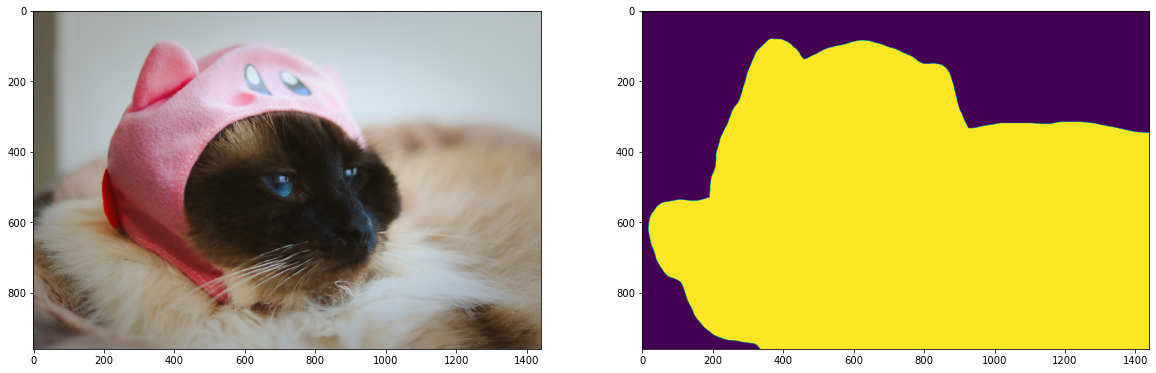

In [3]:
data = JupyterGUI.pickimage('Image_data/Examples/')

In [5]:
data.img.shape

(960, 1440, 3)

# Select ColorSpace

In [6]:
colorspace = JupyterGUI.colorwidget(data.img, paramlist=None)

seg.params = {'colorspace': 'RGB', 'multichannel': True, 'channel': 2}


GridBox(children=(SelectionSlider(continuous_update=False, description='colorspace', options=('RGB', 'HSV', 'R…

Output()

# Select ColorSpace

In [7]:
colorspace = JupyterGUI.colorwidget(data.img, paramlist=None)

seg.params = {'colorspace': 'RGB', 'multichannel': True, 'channel': 2}


GridBox(children=(SelectionSlider(continuous_update=False, description='colorspace', options=('RGB', 'HSV', 'R…

Output()

----
<a name="Manual_Search"></a>

## Manual Search

Manual searching of parameters can easily be done using the provided GUI. Pre-established parameters can be put into the widget, or the parameter values can be changed using the sliders. To change the algorithm, simply change the `alg` input. For a list of available inputs print `Segmentors.algorithmspace`


In [8]:
from see.Segmentors import segmentor

alg = JupyterGUI.picksegment(list(segmentor.algorithmspace.keys()))

Dropdown(description='Choose Algorithm:', index=1, options=('ColorThreshold', 'Felzenszwalb', 'Slic', 'SlicO',…

Perform Felzenszwalb segmentation algorithm.
    
    The felzenszwalb algorithms computes a 
    graph based on the segmentation. Produces an oversegmentation of the multichannel using 
    min-span tree. Returns an integer mask indicating the segment labels.

    Note: a colorspace of 'HSV' and a channel of 2 is a grayscale image.

    https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.felzenszwalb

    Parameters:
    colorspace - (colorspace) Select the colorspace (0:RGB, 1:HSV, 2:LAB)
    channel - (channel) color chanel (0:R/H/L 1:G/S/A, 2:B/V/B)
    scale - (alpha2*1000) - float, higher meanse larger clusters
    sigma - (alpha1) - float, std. dev of Gaussian kernel for preprocessing
    min_size - int(beta1*100) - int, minimum component size (in pixels). For postprocessing
    

segmentor_name='Felzenszwalb'


In [9]:
### Example of input for params
params = JupyterGUI.segmentwidget(data.img, params = None, alg = alg.value)

GridBox(children=(SelectionSlider(continuous_update=False, description='alpha1', options=(0.0, 0.00390625, 0.0…

Output()

----
<a name="Genetic_Algorithm_Search"></a>

## Genetic Algorithm Search

First import image files, as well as the following packages:

In [10]:
from see.Segmentors import segmentor
from see.ColorSpace import colorspace
from see.Workflow import workflow
from see.Segment_Fitness import segment_fitness
from see import base_classes, GeneticSearch
#define algo work flow
workflow.addalgos([colorspace, segmentor, segment_fitness])

To run the genetic algorithm, we need to initialize an instance of an evolver. The original image and ground truth segmentation image are inputs to it, along with an integer value for population size. This value sets how many indivudals are in our population. For this example, we'll set this number to be equal to 10.

In [11]:
mydata = base_classes.pipedata()
mydata.img = data.img
mydata.gmask = data.gmask
#def geneticsearch
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=10)

Now that the evolver has been initialized, we can run the genetic algorithm for a specified number of generations (or iterations). Here we will set this number equal to 5.

In [ ]:
# warnings may appear when this runs
#population -- Resulting population after ngen generations.
population = my_evolver.run(ngen=5) #5 generation
#fitness 1 is worse , 0 is good

Initializing a new random population
Generation 0/5 of population size 10
<class 'see.Workflow.workflow'> parameters: 
	colorspace = YUV
	multichannel = True
	channel = 1
	algorithm = Slic
	alpha1 = 0.6875
	alpha2 = 0.98046875
	beta1 = 0.671875
	beta2 = 0.3125
	gamma1 = 0.328125
	gamma2 = 0.26953125
	n_segments = 5
	max_iter = 1



/mnt/ufs18/home-047/chenqili/local_see/see-segment/see/Segmentors.py:387: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  output = skimage.segmentation.slic(


Time: 1.188 s
fitness=1.0068506877733372

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YIQ
	multichannel = True
	channel = 0
	algorithm = Felzenszwalb
	alpha1 = 0.56640625
	alpha2 = 0.75
	beta1 = 0.234375
	beta2 = 0.203125
	gamma1 = 0.4140625
	gamma2 = 0.95703125
	n_segments = 2
	max_iter = 16

Time: 3.732 s
fitness=0.5491981679729178

<class 'see.Workflow.workflow'> parameters: 
	colorspace = RGB
	multichannel = False
	channel = 0
	algorithm = Watershed
	alpha1 = 0.51171875
	alpha2 = 0.11328125
	beta1 = 0.3203125
	beta2 = 0.83203125
	gamma1 = 0.59765625
	gamma2 = 0.6953125
	n_segments = 2
	max_iter = 11

Time: 2.046 s
fitness=0.9999995026559432

<class 'see.Workflow.workflow'> parameters: 
	colorspace = RGB
	multichannel = True
	channel = 2
	algorithm = MorphGeodesicActiveContour
	alpha1 = 0.66796875
	alpha2 = 0.109375
	beta1 = 0.94921875
	beta2 = 0.70703125
	gamma1 = 0.234375
	gamma2 = 0.79296875
	n_segments = 6
	max_iter = 1

Time: 1.416 s
fitness=1

<class 'see.Workfl

/mnt/ufs18/home-047/chenqili/local_see/see-segment/envs/lib/python3.9/site-packages/skimage/segmentation/morphsnakes.py:106: FutureWarning: circle_level_set is deprecated in favor of disk_level_set.circle_level_set will be removed in version 0.19
  res = circle_level_set(image_shape)


Time: 2.005 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = XYZ
	multichannel = False
	channel = 2
	algorithm = ColorThreshold
	alpha1 = 0.234375
	alpha2 = 0.0
	beta1 = 0.625
	beta2 = 0.11328125
	gamma1 = 0.38671875
	gamma2 = 0.22265625
	n_segments = 1
	max_iter = 1

Time: 1.572 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YDbDr
	multichannel = True
	channel = 1
	algorithm = ColorThreshold
	alpha1 = 0.5859375
	alpha2 = 0.2265625
	beta1 = 0.1953125
	beta2 = 0.3671875
	gamma1 = 0.234375
	gamma2 = 0.28515625
	n_segments = 1
	max_iter = 15

Time: 1.364 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YUV
	multichannel = False
	channel = 2
	algorithm = Morphological_Chan_Vese
	alpha1 = 0.3046875
	alpha2 = 0.55078125
	beta1 = 0.5390625
	beta2 = 0.27734375
	gamma1 = 0.66015625
	gamma2 = 0.90234375
	n_segments = 0
	max_iter = 13

Time: 3.667 s
fitness=1.004012398624279

<class 'see.Workflow.workflow'> parameters: 
	color

Time: 2.477 s
fitness=0.9999855635878135

<class 'see.Workflow.workflow'> parameters: 
	colorspace = RGB CIE
	multichannel = False
	channel = 0
	algorithm = Watershed
	alpha1 = 0.51171875
	alpha2 = 0.55859375
	beta1 = 0.20703125
	beta2 = 0.83203125
	gamma1 = 0.59765625
	gamma2 = 0.9765625
	n_segments = 2
	max_iter = 11

Time: 2.643 s
fitness=1.000000193384997

<class 'see.Workflow.workflow'> parameters: 
	colorspace = RGB
	multichannel = False
	channel = 0
	algorithm = ColorThreshold
	alpha1 = 0.23828125
	alpha2 = 0.11328125
	beta1 = 0.3203125
	beta2 = 0.078125
	gamma1 = 0.4375
	gamma2 = 0.6953125
	n_segments = 2
	max_iter = 4

Time: 0.941 s
fitness=1

#BEST [0.5491981679729178,  ['YIQ', True, 0, 'Felzenszwalb', 0.56640625, 0.75, 0.234375, 0.203125, 0.4140625, 0.95703125, 2, 16]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow 

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YUV
	multichannel = False
	channel = 0
	algorithm = Felzenszwalb
	alpha1 = 0.1875
	alpha2 = 0.921875
	beta1 = 0.74609375
	beta2 = 0.296875
	gamma1 = 0.609375
	gamma2 = 0.46875
	n_segments = 8
	max_iter = 10

Time: 4.706 s
fitness=0.13652921828966982


#BEST [0.13652921828966982,  ['YUV', False, 0, 'Felzenszwalb', 0.1875, 0.921875, 0.74609375, 0.296875, 0.609375, 0.46875, 8, 10]]

----
<a name="Reading_the_Results"></a>

## Reading the Results

After the genetic algorithm is complete, we can retrieve the individuals that resulted in the lowest (best) fitness values by printing `my_evolver.hof`. These individuals are sorted according to fitness value, so to get the overal best individual, we can simply look at the first individual in the list. 

In [19]:
params = my_evolver.hof[0]

print('Best Individual:\n', params)

Best Individual:
 ['YUV', True, 1, 'Slic', 0.50390625, 0.53515625, 0.34375, 0.109375, 0.4609375, 0.5546875, 6, 15]


We can see the mask this individual generates by evaluating it, then plotting the result:

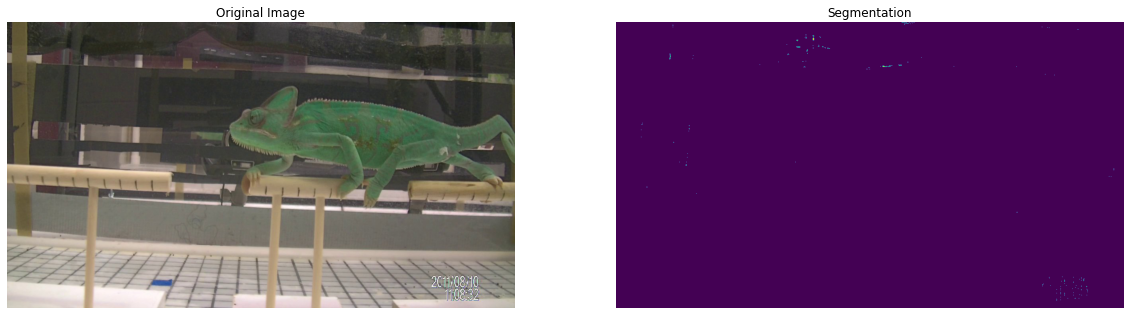

In [20]:
#['YUV', False, 0, 'Felzenszwalb', 0.1875, 0.921875, 0.74609375, 0.296875, 0.609375, 0.46875, 8, 10]
#------------------------------------
#this line is the original code
#seg = Segmentors.algoFromParams(params)
# no attribute  .algoFromParams
#------------------------------------
#what if the class is called wrong: 
#seg = segmentor(param)
# KeyError: 'YUV'
#------------------------------------

#use workflow instead, to create a workf class
#since the parameter input might produce error, use the workflow's parameter to make a seg object

#Debug***

params = ['HSV', True, 0, 'ColorThreshold', 0.25, 0.43359375, 0.19921875, 0.2421875, 0.26171875, 0.3828125, 7, 14]
#Debug***

workf = workflow(params)
seg = segmentor(workf.params)
mask = seg.evaluate(data.img)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(data.img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(mask)
plt.title("Segmentation")
plt.axis('off')

plt.tight_layout
plt.show()

In [21]:
from see.Segment_Fitness import segment_fitness

We can also use `FitnessFunction` to calculate the final fitness value for this algorithm:

In [22]:
#This is original code
#print('Fitness Value: ', Segmentors.FitnessFunction(mask, data.mask)[0])
#AttributeError: module 'see.Segmentors' has no attribute 'FitnessFunction'
#------------------------------------
print('Fitness Value: ', segment_fitness().evaluate(data.mask, data.gmask)[0])

AttributeError: 'Dropdown' object has no attribute 'mask'

If this value is satisfactory, we can then get usable code to run this algorithm anywhere, including outside this notebook. The `print_best_algorithm_code` function does this using the given individual:

In [ ]:
ex = Segmentors.print_best_algorithm_code(my_evolver.hof[0])

With this code, make sure to import skimage, along with any input images this algorithm will be applied to.